In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Input the number of cores you have on your machine.

In [2]:
njobs = 10 

## Run California Experiments

In [3]:
import os
os.chdir('California_Experiments')

In [4]:
from run import run_california
run_california(njobs)

Seed: 0
Seed: 1
Seed: 2
Seed: 3
Seed: 4
Seed: 5
Seed: 6
Seed: 7
Seed: 8
Seed: 9


In [5]:
all_dfs = []
metrics = ['MSE', 'PCE', 'PBL', 'CRPS']
ratios = [1, 100, 10, 10]
for j in range(len(metrics)):
  metric=metrics[j]
  ratio=ratios[j]
  dfs = []
  ranks = []
  for i in range(10):
    dfs.append(pd.read_csv('results/metrics/' + str(i) + '.csv', index_col = 0).loc[:,[metric]]*ratio)
  df = pd.concat(dfs, axis = 1)
  df.columns = range(10)
  df.insert(0, 'Metric', metric)
  all_dfs.append(df)
all_df = pd.concat(all_dfs)
all_df['Avg'] = all_df.iloc[:,1:].mean(1)
all_df.round(3)

,Metric,0,1,2,3,4,5,6,7,8,9,Avg
Base,MSE,0.960,0.890,1.520,0.882,1.140,0.912,1.055,1.207,0.959,0.895,1.042
NLL,MSE,0.875,0.895,0.788,0.863,1.064,1.065,0.849,1.117,0.833,0.858,0.921
CRPS,MSE,0.799,0.830,0.749,0.778,1.056,0.935,0.783,1.096,0.781,0.800,0.861
NLL Bin,MSE,0.718,0.761,0.757,0.653,1.045,0.826,0.709,1.080,0.664,0.698,0.791
CRPS Bin,MSE,0.713,0.753,0.738,0.648,1.046,0.811,0.700,1.071,0.660,0.697,0.784
Weight,MSE,0.707,0.743,0.746,0.647,1.024,0.807,0.698,1.047,0.664,0.688,0.777
Base,PCE,1.546,1.658,6.703,1.307,3.782,2.467,1.977,4.755,1.315,1.214,2.672
NLL,PCE,0.006,0.025,0.011,0.007,0.027,0.036,0.020,0.011,0.017,0.004,0.016
CRPS,PCE,0.520,0.669,0.178,0.429,0.022,0.253,0.260,0.096,0.507,0.388,0.332
NLL Bin,PCE,0.008,0.022,0.018,0.005,0.029,0.036,0.045,0.012,0.004,0.003,0.018


# Run Pinatubo Experiments

In [6]:
os.chdir('../Pinatubo_Experiments')

The following code runs a subset of the Pinatubo experiments: the first 8 months.

In [7]:
from run_subset import run_pinatubo_subset
run_pinatubo_subset()

1991 8
1991 9
1991 10
1991 11
1991 12
1992 1
1992 2
1992 3


If you want to generate results for all 53 months, you can uncomment the following code. To save time, we have saved the learned number of bins for each test month in `pinatubo_learned_nbins.npy`. When `learn_nbins = False`, the code will not learn the number of bins in each iteration. 

In [8]:
#from run_full import run_pinatubo
#learn_nbins = True
#run_pinatubo(njobs, learn_nbins)

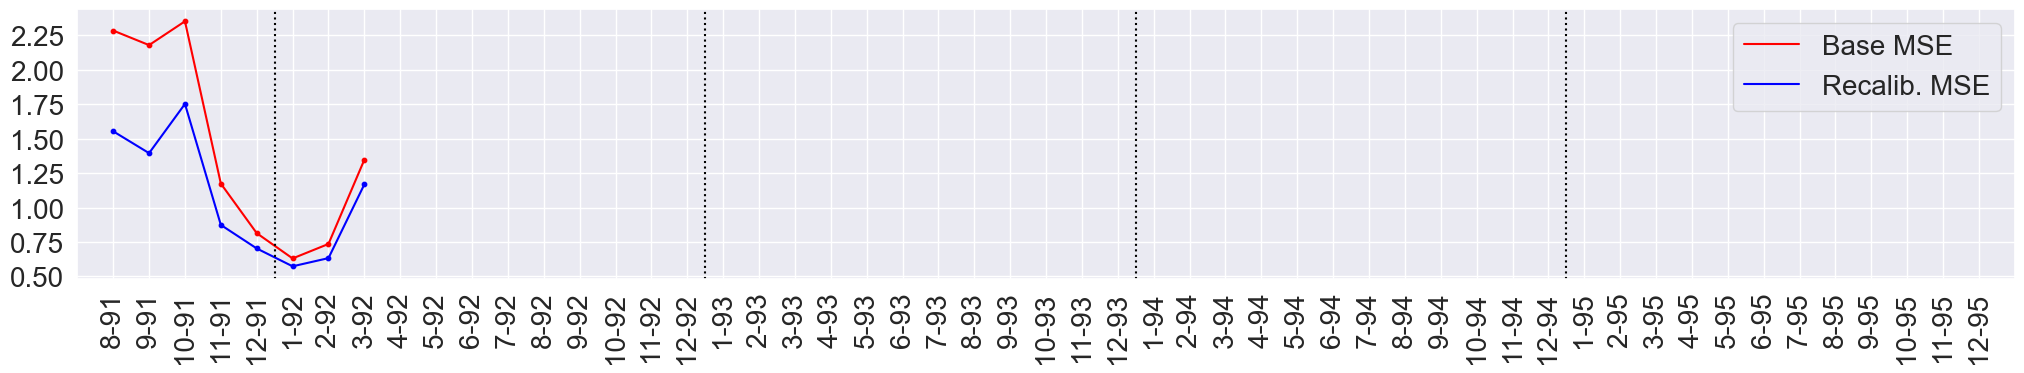

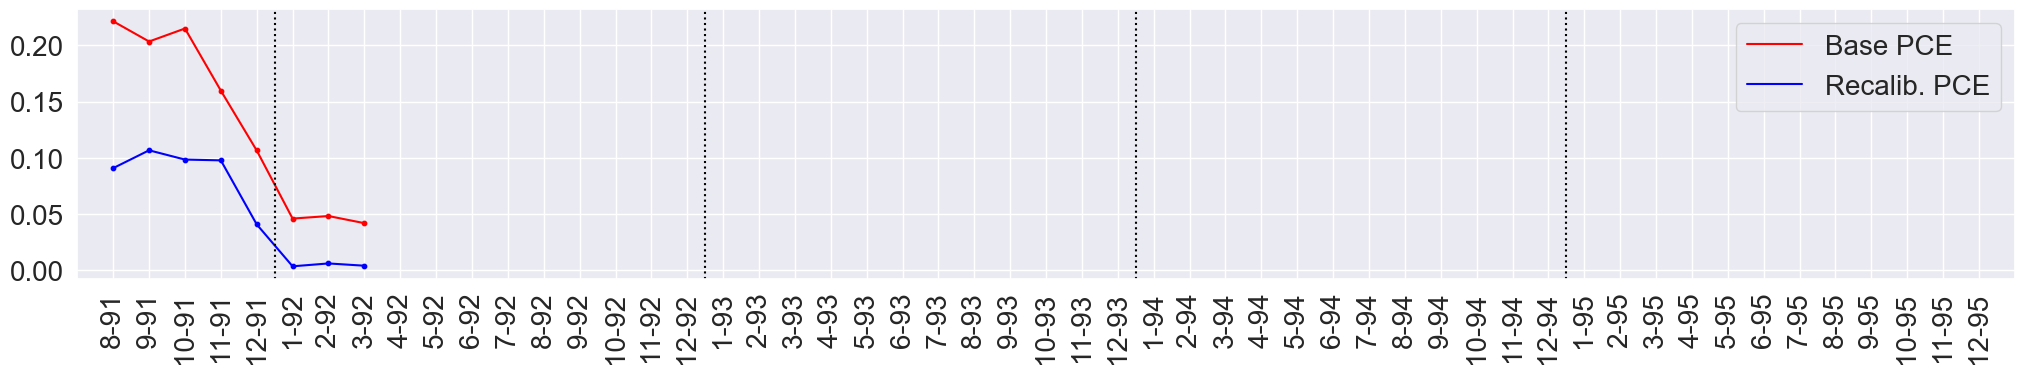

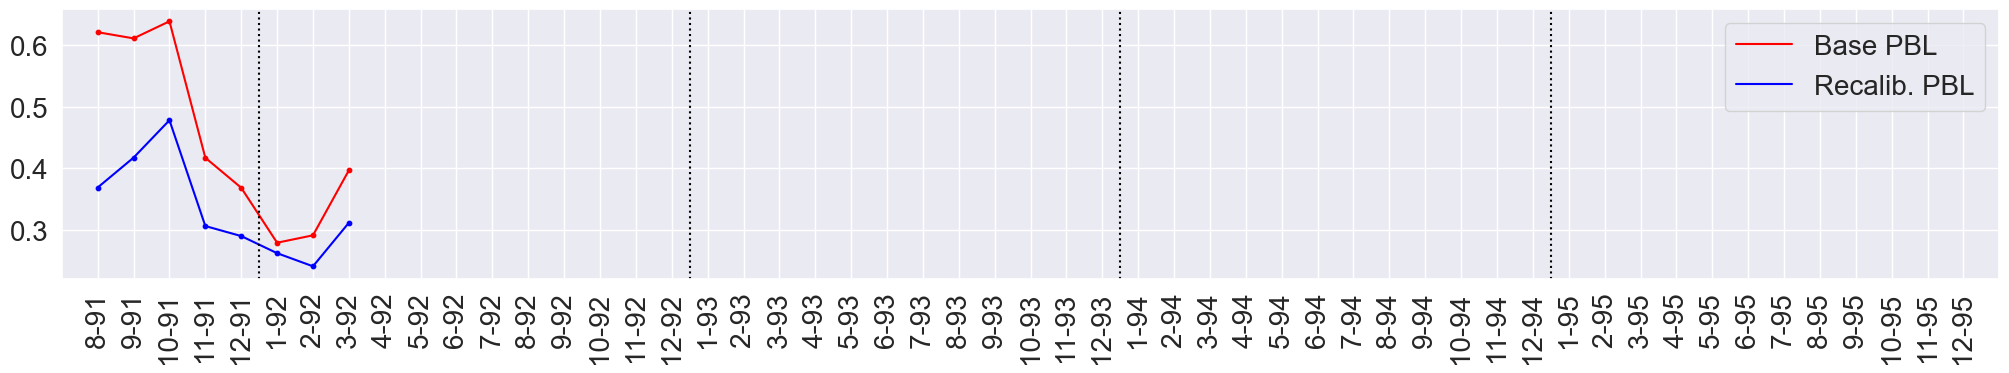

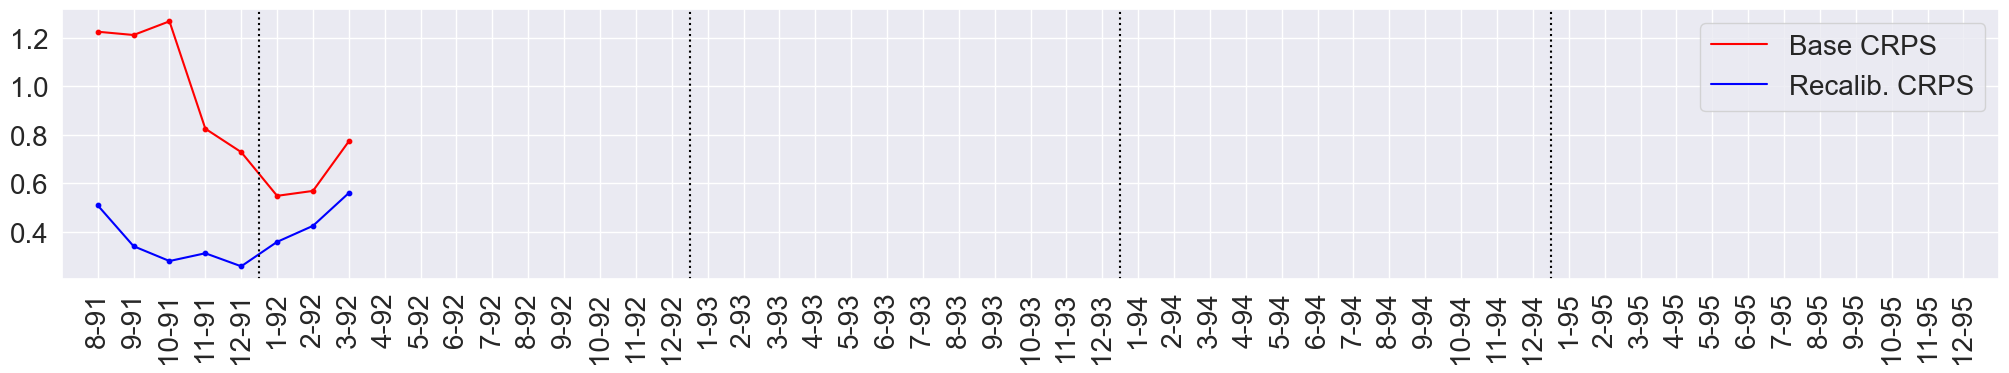

In [9]:
res_base = pd.read_csv('results_base.csv')
res_recalib = pd.read_csv('results_recalib.csv')
dates = [str(m) + '-91' for m in range(8,13)] + [str(m) + '-' + str(y) for y in range(92,96) for m in range(1,13)]

def get_year_month(res):
  r = res.reset_index().drop(['index'], axis = 1)
  r['Date'] = r['Month'].astype(str) + '-' + r['Year'].astype(str).str[2:4]
  return r.drop(['Year', 'Month'], axis = 1)

res_base = get_year_month(res_base)
res_recalib = get_year_month(res_recalib)

def plot(date, base, recalib, label):
  plt.figure(figsize=(25,3.5))
  plt.plot(date, base, label = 'Base ' + label, color = 'red')
  plt.scatter(date, base, s = 10, color = 'red')
  plt.plot(date, recalib, label = 'Recalib. ' + label, color = 'blue')
  plt.scatter(date, recalib, s = 10, color = 'blue')
  plt.legend(fontsize = 20)
  plt.xticks(dates, rotation = 90, fontsize = 20);
  plt.yticks(fontsize = 20)
  plt.xlim([-1,len(dates)])
  plt.axvline(x=4.5, color = 'black', linestyle = 'dotted')
  plt.axvline(x=16.5, color = 'black', linestyle = 'dotted')
  plt.axvline(x=28.5, color = 'black', linestyle = 'dotted')
  plt.axvline(x=40.5, color = 'black', linestyle = 'dotted')
  plt.savefig(label + ".png", bbox_inches="tight", dpi = 600)
  plt.show()

plot(res_base['Date'], res_base['0'], res_recalib['0'], 'MSE')
plot(res_base['Date'], res_base['1'], res_recalib['1'], 'PCE')
plot(res_base['Date'], res_base['2'], res_recalib['2'], 'PBL')
plot(res_base['Date'], res_base['3'], res_recalib['3'], 'CRPS')